# Multivariate Time Series with RNN

<b> NOTE: In general, it is very difficult to get good performance from an LSTM based RNN model for multivariate series. We highly recommend using SARIMAX based methods if you have a real-world situation requiring multi-variate time series data.

Appliance Energy Usage: A Multivariate Time Series Forecasting Example

Experimental data used to create regression models of appliances energy use in a low energy building. Data Set Information:

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters). Original source of the dataset:

http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Data\data tensorflow\energydata_complete.csv', index_col ='date',infer_datetime_format=True)

In [3]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


## EDA

In [4]:
df.shape

(19735, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 

In [6]:
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [7]:
plt.style.use(['science','notebook','grid'])

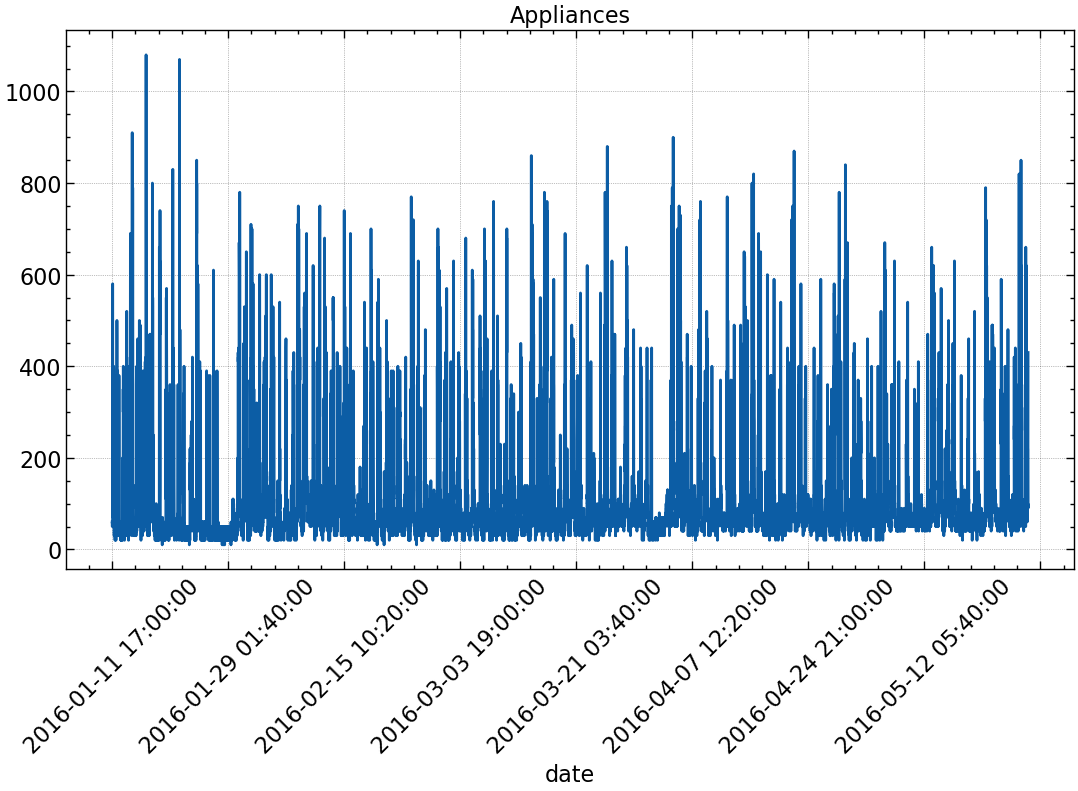

In [8]:
df['Appliances'].plot(figsize=(13, 7));
plt.xticks(rotation=45)
plt.title('Appliances')
plt.show()

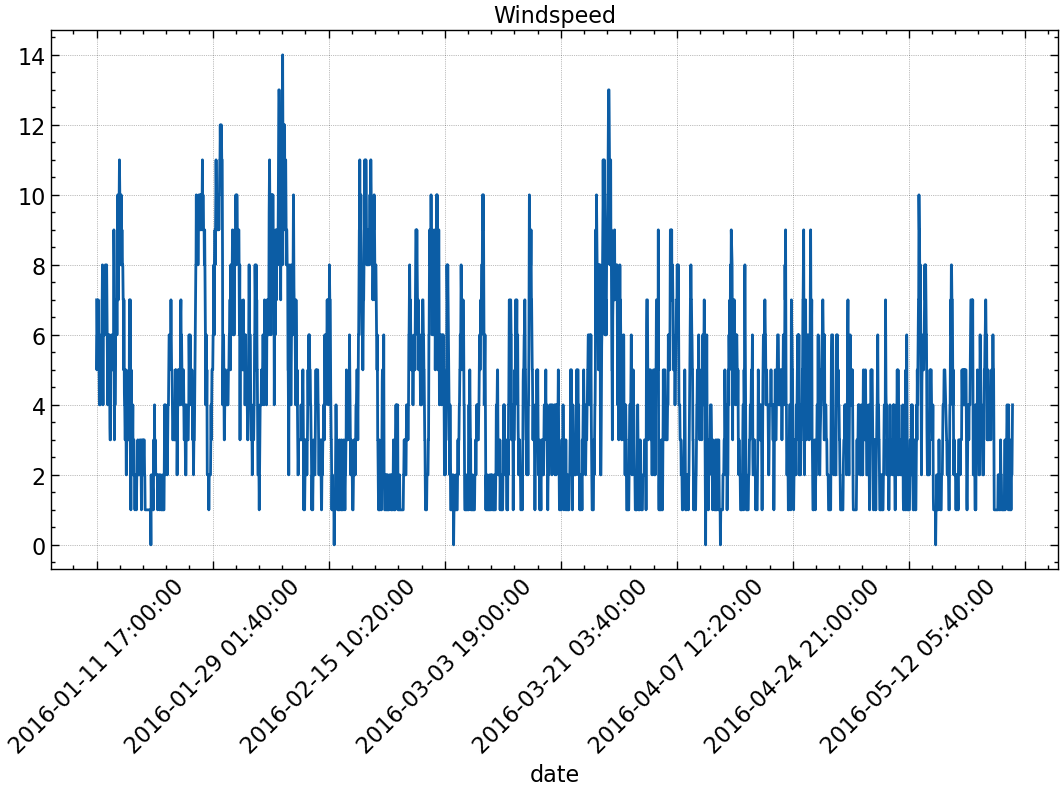

In [9]:
df['Windspeed'].plot(figsize=(13, 7));
plt.title('Windspeed')
plt.xticks(rotation=45)
plt.show()

## Train test split 

In [10]:
len(df)

19735

In [11]:
df.head(4)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389


In [12]:
df.tail()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [13]:
df.loc['2016-05-01':]

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,50,0,21.200000,38.200000,18.390000,41.400000,23.200000,36.400000,19.73,37.730000,...,19.166667,38.200000,4.300000,763.700000,86.000000,2.000000,40.000000,2.200000,15.310003,15.310003
2016-05-01 00:10:00,60,0,21.150000,38.172500,18.390000,41.500000,23.133333,36.466667,19.70,37.663333,...,19.133333,38.290000,4.283333,763.716667,86.333333,2.166667,38.166667,2.216667,11.240067,11.240067
2016-05-01 00:20:00,50,0,21.133333,38.090000,18.323333,41.500000,23.200000,36.500000,19.70,37.590000,...,19.133333,38.363333,4.266667,763.733333,86.666667,2.333333,36.333333,2.233333,21.808814,21.808814
2016-05-01 00:30:00,50,0,21.100000,38.090000,18.290000,41.500000,23.200000,36.500000,19.70,37.500000,...,19.166667,38.500000,4.250000,763.750000,87.000000,2.500000,34.500000,2.250000,47.000534,47.000534
2016-05-01 00:40:00,60,0,21.100000,38.030000,18.290000,41.560000,23.200000,36.500000,19.70,37.500000,...,19.166667,38.633333,4.233333,763.766667,87.333333,2.666667,32.666667,2.266667,8.059441,8.059441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.70,45.590000,...,23.200000,46.790000,22.733333,755.200000,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.70,45.590000,...,23.200000,46.790000,22.600000,755.200000,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.70,45.730000,...,23.200000,46.790000,22.466667,755.200000,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


In [14]:
df = df.loc['2016-05-01':]

In [15]:
# Membulatkan semua data karena angkanya berbentuk desimal
df = df.round(2)

In [16]:
df.values

array([[ 50.  ,   0.  ,  21.2 , ...,   2.2 ,  15.31,  15.31],
       [ 60.  ,   0.  ,  21.15, ...,   2.22,  11.24,  11.24],
       [ 50.  ,   0.  ,  21.13, ...,   2.23,  21.81,  21.81],
       ...,
       [270.  ,  10.  ,  25.5 , ...,  13.27,  29.2 ,  29.2 ],
       [420.  ,  10.  ,  25.5 , ...,  13.23,   6.32,   6.32],
       [430.  ,  10.  ,  25.5 , ...,  13.2 ,  34.12,  34.12]])

In [17]:
len(df)

3853

---
----
## Train test split

-------
#### Mengitung jumlah perputaran per 10 menit selama 24 jam
------



In [18]:
# menghitung 1 hari berapa jam =  1 hari = 24 jam
# menghitung 1 jam berapa menit = 1 jam = 60 menit
# menganalisa data per 10 menit

(24*60)/10 # jumlah update data dalam sehari

144.0

In [19]:
# data testing meggunakan 2 hari untuk menghemat waktu
days = 2

In [20]:
test_index = days * 144

In [21]:
test_index

288

In [22]:
# data testing 288

train = df.iloc[:-test_index]
test = df.iloc[-test_index:]

In [23]:
train.shape

(3565, 28)

In [24]:
test.shape

(288, 28)

In [25]:
train.shape, test.shape

((3565, 28), (288, 28))

In [26]:
len(df)

3853

-----
----
## Scaler data

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
scaler_train = scaler.fit_transform(train)

In [30]:
scaler_test = scaler.transform(test)

-----
-----
## Timeseries Generator

In [31]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator 

In [32]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module keras.src.preprocessing.sequence:

class TimeseriesGenerator(keras.src.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  Deprecated: `tf.keras.preprocessing.sequence.TimeseriesGenerator` does not
 |  operate on tensors and is not recommended for new code. Prefer using a
 |  `tf.data.Dataset` which provides a more efficient and flexible mechanism for
 |  batching, shuffling, and windowing input. See the
 |  [tf.data guide](https://www.tensorflow.org/guide/data) for more details.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  
 |  Arguments:
 |      data: Indexable generator (su

In [33]:
# 
length = 144 # nilai output perhari
generator = TimeseriesGenerator(scaler_train, scaler_train, length=length, batch_size=1)

In [34]:
# menampilkan batch pertama
X,y = generator[0]

In [35]:
print(f'Array : {X.flatten()} \n')
print(f'Prediksi y : {y}')

Array : [0.03896104 0.         0.13798978 ... 0.14319527 0.75185111 0.75185111] 

Prediksi y : [[0.03896104 0.         0.30834753 0.29439421 0.16038492 0.49182278
  0.0140056  0.36627907 0.24142857 0.24364791 0.12650602 0.36276002
  0.12       0.28205572 0.06169297 0.15759185 0.34582624 0.39585974
  0.09259259 0.39649608 0.18852459 0.96052632 0.59210526 0.1
  0.58333333 0.13609467 0.4576746  0.4576746 ]]


---
--- 
## Create Model

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [37]:
n_features = scaler_train.shape[1]
n_features

28

In [38]:
model =Sequential()

model.add(LSTM(100, input_shape=(length, n_features)))
model.add(Dense(28))
model.compile(loss='mse', optimizer='adam')

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               51600     
                                                                 
 dense (Dense)               (None, 28)                2828      
                                                                 
Total params: 54428 (212.61 KB)
Trainable params: 54428 (212.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


---
---
## Add Earlystopping and Validation Generator

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [42]:
# validation generator
validation_generator = TimeseriesGenerator(scaler_test, scaler_test, length=length, batch_size =1)

----
------
## Fitting Model Generator

In [43]:
model.fit(generator, epochs =10,
          validation_data=validation_generator,
          callbacks =[early_stop] )

Epoch 1/10
3421/3421 [==============================] - 294s 83ms/step - loss: 0.0115 - val_loss: 0.0094
Epoch 2/10
3421/3421 [==============================] - 268s 78ms/step - loss: 0.0079 - val_loss: 0.0088
Epoch 3/10
3421/3421 [==============================] - 271s 79ms/step - loss: 0.0075 - val_loss: 0.0081
Epoch 4/10
3421/3421 [==============================] - 275s 80ms/step - loss: 0.0073 - val_loss: 0.0082
Epoch 5/10
3421/3421 [==============================] - 280s 82ms/step - loss: 0.0072 - val_loss: 0.0086


In [44]:
losses = pd.DataFrame(model.history.history)

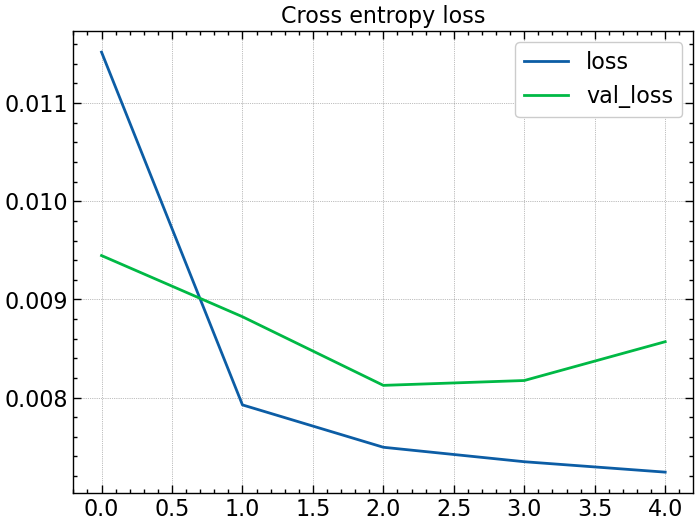

In [45]:
losses.plot(title='Cross entropy loss');

## inverse transform and compire

In [46]:
test_predictions =[]
first_evaluation_batch = scaler_train[-length:]
current_batch =  first_evaluation_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)
    
    

1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 69ms/step


In [47]:
true_predictions = scaler.inverse_transform(test_predictions)

In [48]:
true_predictions

array([[ 85.69337919,   2.62207523,  24.58805995, ...,   7.91943473,
         26.57078159,  26.02220282],
       [ 70.51728398,   3.76002833,  24.60930532, ...,   8.05185077,
         27.10143311,  26.64003935],
       [ 63.41925196,   4.55089599,  24.60348542, ...,   8.2226527 ,
         27.24105959,  26.92121043],
       ...,
       [ 98.39880079,   2.76247345,  23.8193878 , ...,   6.8614884 ,
         31.94262593,  30.82212632],
       [101.93367235,   2.74776891,  23.91982204, ...,   7.23893467,
         31.99513292,  30.87410613],
       [105.66845931,   2.73353398,  24.02245982, ...,   7.62732646,
         32.05058857,  30.93268319]])

In [49]:
test

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-25 18:10:00,170,0,24.50,37.86,24.00,34.27,25.00,36.70,24.29,37.79,...,22.00,37.23,16.48,756.1,55.83,2.00,38.17,7.62,38.14,38.14
2016-05-25 18:20:00,310,0,24.50,37.30,23.86,34.33,24.94,36.67,24.29,37.79,...,22.00,37.36,16.47,756.1,55.67,2.00,36.33,7.53,31.16,31.16
2016-05-25 18:30:00,120,0,24.50,36.96,23.73,34.33,24.85,36.50,24.29,37.79,...,22.03,37.39,16.45,756.1,55.50,2.00,34.50,7.45,4.40,4.40
2016-05-25 18:40:00,120,0,24.50,37.00,23.70,34.40,24.84,36.45,24.29,37.90,...,22.10,37.72,16.43,756.1,55.33,2.00,32.67,7.37,27.12,27.12
2016-05-25 18:50:00,120,0,24.49,37.07,23.68,34.52,24.84,36.49,24.28,37.93,...,22.10,37.81,16.42,756.1,55.17,2.00,30.83,7.28,10.27,10.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.57,46.56,25.89,42.03,27.20,41.16,24.70,45.59,...,23.20,46.79,22.73,755.2,55.67,3.33,23.67,13.33,43.10,43.10
2016-05-27 17:30:00,90,0,25.50,46.50,25.75,42.08,27.13,41.22,24.70,45.59,...,23.20,46.79,22.60,755.2,56.00,3.50,24.50,13.30,49.28,49.28
2016-05-27 17:40:00,270,10,25.50,46.60,25.63,42.77,27.05,41.69,24.70,45.73,...,23.20,46.79,22.47,755.2,56.33,3.67,25.33,13.27,29.20,29.20


In [50]:
true_predictions = pd.DataFrame(data =true_predictions, columns=test.columns)

In [51]:
true_predictions

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,85.693379,2.622075,24.588060,37.925893,24.247930,35.257862,25.119725,36.895814,24.101654,36.808533,...,22.093551,37.357456,16.650662,756.369540,57.802351,1.902369,41.092230,7.919435,26.570782,26.022203
1,70.517284,3.760028,24.609305,37.750162,24.303351,35.211020,25.079395,36.885522,24.061572,36.396252,...,22.121629,37.265157,16.464409,756.538583,59.191832,1.741519,41.530617,8.051851,27.101433,26.640039
2,63.419252,4.550896,24.603485,37.531085,24.319957,35.056530,25.039165,36.786000,24.021933,36.144015,...,22.133779,37.190862,16.149307,756.532850,60.743382,1.471916,41.633518,8.222653,27.241060,26.921210
3,58.991129,5.100308,24.604070,37.435809,24.335691,34.989929,25.021839,36.712997,24.014556,36.014460,...,22.156898,37.142584,15.820475,756.563037,62.716109,1.181604,41.669853,8.462701,27.451114,27.208374
4,54.952820,5.501259,24.602806,37.414260,24.343363,34.991483,25.017034,36.656524,24.019584,35.949066,...,22.181210,37.086674,15.437317,756.613841,64.938513,0.874327,41.597733,8.720658,27.665833,27.492083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,91.891456,2.795176,23.624884,56.189232,25.974829,51.602631,26.603456,49.598231,21.401144,54.342930,...,20.750783,60.094381,2.180075,775.738526,114.990357,3.800288,41.613945,6.143959,31.847774,30.738420
284,95.054562,2.778131,23.721093,56.675749,26.047856,52.100193,26.727486,49.880648,21.424768,54.854048,...,20.817310,60.368667,2.529733,775.429678,115.020146,3.818636,41.101307,6.496179,31.893422,30.776875
285,98.398801,2.762473,23.819388,57.180628,26.116708,52.625361,26.858486,50.173066,21.446804,55.381853,...,20.886351,60.644131,2.883995,775.107976,115.097880,3.838885,40.567851,6.861488,31.942626,30.822126
286,101.933672,2.747769,23.919822,57.704325,26.181645,53.178464,26.996884,50.475103,21.466955,55.926573,...,20.957815,60.920969,3.241661,774.772948,115.224692,3.861056,40.014365,7.238935,31.995133,30.874106


## Save Model

In [52]:
from tensorflow.keras.models import load_model

In [53]:
model.save('multivariat.h5')

C:\Users\ibrahim\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
